<a href="https://colab.research.google.com/github/Entspannter/CrispCerebella/blob/main/train_LSTM_finalmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/Entspannter/CrispCerebella/blob/main/Test_File.ipynb)

In [2]:
!git clone https://github.com/Entspannter/CrispCerebella.git

Cloning into 'CrispCerebella'...
remote: Enumerating objects: 585, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 585 (delta 5), reused 0 (delta 0), pack-reused 573
Receiving objects: 100% (585/585), 226.77 MiB | 21.51 MiB/s, done.
Resolving deltas: 100% (306/306), done.
Checking out files: 100% (210/210), done.


In [3]:
pip install -q -U keras-tuner

     |████████████████████████████████| 96 kB 4.1 MB/s 


In [4]:
import os 
from google.colab import files
from tensorflow.keras.utils import to_categorical
import keras_tuner

In [5]:
# Import own functions and model-classes
from CrispCerebella.Code.train_functions import *
from CrispCerebella.Code.data_loading import *
from CrispCerebella.Code.architecture import *


In [6]:
SEED = 42
set_global_determinism(SEED)

In [7]:
# load all train
trainX, trainy = datasetloader('train', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
print("Shape of training Data:",trainX.shape, trainy.shape)
# load all test
testX, testy = datasetloader('test', '/content/CrispCerebella/Dataset/UCI HAR Dataset/')
print("Shape of test Data:",testX.shape, testy.shape)

Shape of training Data: (7352, 128, 9) (7352, 1)
Shape of test Data: (2947, 128, 9) (2947, 1)


In [8]:
# transform the output date into categorical (one-hot-encoding) and print the updated shapes
trainX, trainy, testX, testy = transform_dataset(trainX, trainy, testX, testy)

n_timesteps, n_features, N_OUTPUTS = trainX.shape[1], trainX.shape[2], trainy.shape[1]

n_steps, n_length = 4, 32

# define the inout share for the LSTM model
INPUT_SHAPE=(n_timesteps,n_features)

Num_Epochs_Search = 40
Num_Epochs_Fit = 40
Max_Trials = 10
Num_K_Folds = 5
Model_Name_LSTM = "LSTM"
batch_size = 64

# merge the train and test data to recreate the initial dataset for later
# splitting in the k-fold process
X_LSTM = np.concatenate((trainX, testX),axis=0)
y_LSTM = np.concatenate((trainy, testy),axis=0)


(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)


In [9]:
# Hyperparameters tuning inside of k-fold CV
Best_HP_LSTM, Best_Epoch_LSTM= k_fold_cv(X_LSTM,
                                                              y_LSTM,
                                                              LSTMStacked,
                                                              Model_Name_LSTM,
                                                              INPUT_SHAPE,
                                                              N_OUTPUTS,
                                                              Max_Trials,
                                                              Num_Epochs_Search,
                                                              Num_Epochs_Fit,
                                                              Num_K_Folds)


Trial 10 Complete [00h 00m 57s]
val_accuracy: 0.8598300814628601

Best val_accuracy So Far: 0.9120145440101624
Total elapsed time: 00h 14m 31s
INFO:tensorflow:Oracle triggered exit
Epoch 1/40
206/206 [==============================] - 7s 20ms/step - loss: 1.0209 - accuracy: 0.5740 - val_loss: 0.7684 - val_accuracy: 0.6468
Epoch 2/40
206/206 [==============================] - 3s 15ms/step - loss: 0.5937 - accuracy: 0.7500 - val_loss: 0.6743 - val_accuracy: 0.7269
Epoch 3/40
206/206 [==============================] - 3s 15ms/step - loss: 0.4033 - accuracy: 0.8371 - val_loss: 0.4546 - val_accuracy: 0.8180
Epoch 4/40
206/206 [==============================] - 3s 15ms/step - loss: 0.3357 - accuracy: 0.8827 - val_loss: 0.3101 - val_accuracy: 0.8629
Epoch 5/40
206/206 [==============================] - 3s 15ms/step - loss: 0.2153 - accuracy: 0.9263 - val_loss: 0.3197 - val_accuracy: 0.8792
Epoch 6/40
206/206 [==============================] - 3s 15ms/step - loss: 0.1600 - accuracy: 0.9446 - v

In [10]:
# Print the hyperparameters that yielded the best model all over the k-folds
Best_HP_LSTM.get_config()['values']

{'Units_LSTM_1': 512,
 'Units_LSTM_2': 512,
 'dense_activation': 'relu',
 'dropout_1': 0.2,
 'dropout_2': 0.5,
 'learning_rate': 0.0001,
 'units': 352}

Epoch 1/39
184/184 [==============================] - 13s 52ms/step - loss: 1.1512 - accuracy: 0.5042 - val_loss: 1.0168 - val_accuracy: 0.6098
Epoch 2/39
184/184 [==============================] - 9s 49ms/step - loss: 0.7679 - accuracy: 0.6574 - val_loss: 0.8293 - val_accuracy: 0.6424
Epoch 3/39
184/184 [==============================] - 9s 49ms/step - loss: 0.6388 - accuracy: 0.7240 - val_loss: 0.8126 - val_accuracy: 0.6995
Epoch 4/39
184/184 [==============================] - 9s 49ms/step - loss: 0.5707 - accuracy: 0.7628 - val_loss: 0.7693 - val_accuracy: 0.7118
Epoch 5/39
184/184 [==============================] - 9s 49ms/step - loss: 0.5551 - accuracy: 0.7767 - val_loss: 0.7375 - val_accuracy: 0.7294
Epoch 6/39
184/184 [==============================] - 9s 49ms/step - loss: 0.4193 - accuracy: 0.8369 - val_loss: 0.6139 - val_accuracy: 0.7995
Epoch 7/39
184/184 [==============================] - 9s 49ms/step - loss: 0.3662 - accuracy: 0.8669 - val_loss: 0.6307 - val_accuracy: 0.823

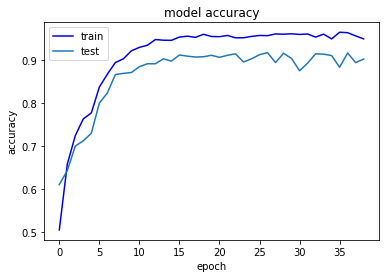

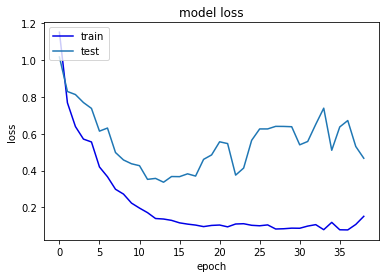

The accuracy of the model is 0.913810670375824


In [11]:
# Build a new model with the HP, train it with the inital training set and eveluate it with the test set 

BestModelLSTM, LSTM_accuracy = evaluate_model(trainX,
                               trainy,
                               testX,
                               testy,
                               INPUT_SHAPE,
                               N_OUTPUTS,
                               Best_HP_LSTM,
                               LSTMStacked,
                               Best_Epoch_LSTM,
                               batch_size)


In [ ]:
# create a unique file name by attaching the first four accuracy digits

file_name_ending = str(int(LSTM_accuracy * 10000))

In [ ]:
# save the model by using the unique file name (model name + accuracy)
BestModelLSTM.save("/content/CrispCerebella/Models/Final_Model_LSTM_" + file_name_ending)

In [14]:
# create a zip file out of the saved model

!zip -r /content/CrispCerebella/Models/Final_Model_LSTM_{file_name_ending}.zip /content/CrispCerebella/Models/Final_Model_LSTM_{file_name_ending}

  adding: content/CrispCerebella/Models/Final_Model_LSTM_9138/ (stored 0%)
  adding: content/CrispCerebella/Models/Final_Model_LSTM_9138/variables/ (stored 0%)
  adding: content/CrispCerebella/Models/Final_Model_LSTM_9138/variables/variables.index (deflated 67%)
  adding: content/CrispCerebella/Models/Final_Model_LSTM_9138/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/CrispCerebella/Models/Final_Model_LSTM_9138/assets/ (stored 0%)
  adding: content/CrispCerebella/Models/Final_Model_LSTM_9138/keras_metadata.pb (deflated 81%)
  adding: content/CrispCerebella/Models/Final_Model_LSTM_9138/saved_model.pb (deflated 89%)


In [15]:
# downloading the zip file (to store it locally and be able to push it to git)

files.download(f"/content/CrispCerebella/Models/Final_Model_LSTM_{file_name_ending}.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
# unzip the folder of the model with a given accuracy
# !unzip /content/CrispCerebella/Models/Final_Model_LSTM_{file_name_ending}.zip -d /Test

In [17]:
# load the saved model
# test_model = keras.models.load_model(f'/content/CrispCerebella/Test/content/CrispCerebella/Models/Final_Model_LSTM_{file_name_ending}')

In [18]:
# evaluate the saved model
# test_model.evaluate(testX, testy)